# Clustering on Figueroa data

Aims:
- reproduce the Figueroa patient clusters (16 clusters) and assign the same labels as in Figueroa 2009
- for each cluster, obtain signature genes and plot the heatmap
- determine the best strategy for clustering the gene probes

In [2]:
library(ade4)
library(hashmap)
library(gdata)
library(pheatmap)
library(viridis)
library(impute)
library(NbClust)
library(factoextra)
library(reshape2)

In [3]:
# load RNAseq and methylation data
rnaseq <- read.csv('../data/Figueroa/data/GEP-filtered.tsv', sep='\t', stringsAsFactor=F,
                       header=T) # Affymetrix Human Genome U133 Plus 2.0 Array
methylation <- read.csv('../data/Figueroa/data/methylation-filtered.tsv', sep='\t', stringsAsFactor=F,
                       header=T)
sd.methylation <- apply(methylation[,-seq(2)], 1, function(x) sd(x))
probes.idx <- sd.methylation > 1
sum(sd.methylation > 1) # 3745 matching number from Figueroa
methylation.filtered <- methylation[probes.idx,]

[1] 3745

In [4]:
# clustering on patients (1 - pearson correlation, ward clustering )
dist.matrix <- as.dist(1 - cor(methylation.filtered[,-seq(2)], method='pearson'))
dist.matrix.euc <- lingoes(dist.matrix)
clustering <- hclust(dist.matrix.euc, method='ward.D')
cluster.membership <- cutree(clustering, k = 16)
sort(table(cluster.membership))

cluster.membership
12  8 15 16 13  9 11  7  6  5  3  1  2 14  4 10 
 6  8  9  9 10 12 12 14 18 24 26 31 31 34 45 55 

In [5]:
# obtain the patient ID for each cluster
patients.id <- list(c(2172, 2189, 2202, 2215, 3309, 5353, 5365, 6363, 6881, 7150, 2235, 2249, 
                     2254, 2274, 2287, 2293, 2647, 3329, 6243, 6717, 6891, 7079, 7139, 7315, 7402, 7412),
                   c(2686, 3483, 3491, 6247, 7075, 7185, 2190, 2228, 2664, 6454, 7117, 7177, 2186,
                    2250, 2276, 2283, 2290, 2301, 2327, 2747, 2757, 3308, 3313, 3318, 3323, 4338,
                    5288, 5290, 5349, 5350, 5354, 5361, 5363, 6240, 6357, 6359, 6373, 6375, 6449, 6450, 6453, 6458, 7073, 7116,
                    7118, 7136, 7143, 7151, 7167, 7304, 7311, 7312, 7325, 7419, 7423),
                   c(2237, 2192, 3327, 2204, 2210, 2762, 2751, 2197, 2200, 2208, 2243, 2245, 2259, 2267,
                    2297, 2549, 2749, 2752, 2767, 2769, 3332, 5283, 5357, 6365, 6372, 6457, 6889, 7062,
                    7081, 7114, 7403),
                   c(1316, 2218, 2230, 2234, 2240, 2242, 2253, 2273, 2545, 2748, 2753, 6376, 7148, 7406),
                   c(7324, 7070, 7172, 7308, 2247, 2280, 2307, 2666, 2756, 3310, 3481, 4337, 4339, 4342, 
                    5355, 6236, 6356, 6370, 6374, 6379, 6455, 7058, 7059, 7071, 7077, 7084, 7137, 7146, 
                    7183, 7187, 7307, 7317, 7320, 7408),
                   c(322, 1448, 2170, 2179, 2219, 2265, 7134, 7273),
                   c(2188, 7302, 2226, 1188, 1299, 1432, 2199, 2203, 2216, 2220, 2229, 2268, 2300, 2305,
                    2326, 2764, 2765, 3492, 4335, 5289, 5348, 6456, 6887, 7147, 7154, 7161, 7180, 7301,
                    7326, 7418, 7420),
                   c(5356, 5359, 7323, 2207, 2288, 2292, 5291, 5351, 6237, 6238, 6239, 6448, 7051, 7067, 
                     7072, 7074, 7122, 7168, 7169, 7176, 7303, 7316, 7319, 7416),
                   c(4341, 6462, 4336, 6735, 6975, 7127, 7309, 5364, 7186),
                   c(2238, 2668, 3314, 6947, 7076, 5360),
                   c(6882, 2217, 2285, 3316, 5358, 6364, 7166, 7178, 7306),
                   c(2255, 2177, 2236, 2246, 2271, 2286, 2299, 2754, 6463, 7052, 7145, 7421),
                   c(2176, 2206, 4334, 2191, 2244, 1747, 2181, 2182, 2183, 2185, 2198, 2257, 2261, 2275, 
                     2278, 2282, 2284, 2289, 2291, 2670, 2672, 2771, 3311, 3312, 3321, 4333, 5286, 6241,
                    6371, 6378, 7119, 7121, 7124, 7125, 7131, 7188, 7305, 7310, 7314, 7318, 7322, 7328, 
                     7407, 7413, 7414),
                   c(2194, 1174, 2173, 2175, 2193, 2209, 2214, 2224, 2227, 2239, 2306, 3320, 3328, 3489,
                    4340, 5287, 6945, 7115),
                   c(5352, 5362, 7142, 1595, 2171, 2223, 2248, 2256, 2260, 2279, 3484, 3493),
                   c(1766, 2187, 2195, 2241, 2296, 3330, 3331, 5282, 7313, 7411))

In [6]:
patients.methylation <- read.csv('../data/Figueroa/data/GSE18700-samples.tsv', sep='\t', header=T, stringsAsFactor=F)
patients.map <- hashmap(patients.methylation$Title, patients.methylation$Accession) # map from ID to accession

In [7]:
# load methylation gene signature for each clusters
n <- 16
clusters <- list()
for (i in seq(n)) {
    clusters[[i]] <- read.xls('../data/mmc3.xls', sheet=i, skip=1, header=T, stringsAsFactor=F)
}

In [11]:
plotCluster <- function(idx) {
    for (i in idx) {
        patients.idx <- (colnames(methylation) %in% patients.map[[patients.id[[i]]]])[-seq(2)]
        probes.idx <- which(methylation$Gene %in% clusters[[i]][,1])
        cluster.data <- data.matrix(methylation[probes.idx, -seq(2)])#patients.idx]
        # z score transformation
        
        dist.matrix <- lingoes(as.dist(1 - cor(cluster.data, method='pearson')))
        clustering <- hclust(dist.matrix)
        
        cluster.zscore <- data.matrix(cluster.data)
        for (j in seq(5)) {
            cluster.zscore <- apply(cluster.zscore, 2, scale)
            cluster.zscore <- t(apply(cluster.zscore, 1, scale))
        }
        
            
        colnames(cluster.zscore) <- colnames(cluster.data)
        annotation <- data.frame(cluster=factor(patients.idx))
        rownames(annotation) <- colnames(cluster.data)

        res <- pheatmap(
          mat               = cluster.zscore, 
          annotation_col    = annotation,
          annotation_legend = F,
          annotation_names_col = F,
          color             = inferno(20),
          border_color      = NA,
          cluster_cols      = clustering,
          show_colnames     = FALSE,
          show_rownames     = FALSE,
          cluster_distance_rows = 'correlation',
          clustering_method = "complete",
          fontsize          = 14,
          main              = paste0("patient cluster ", i)
        )
    }
}


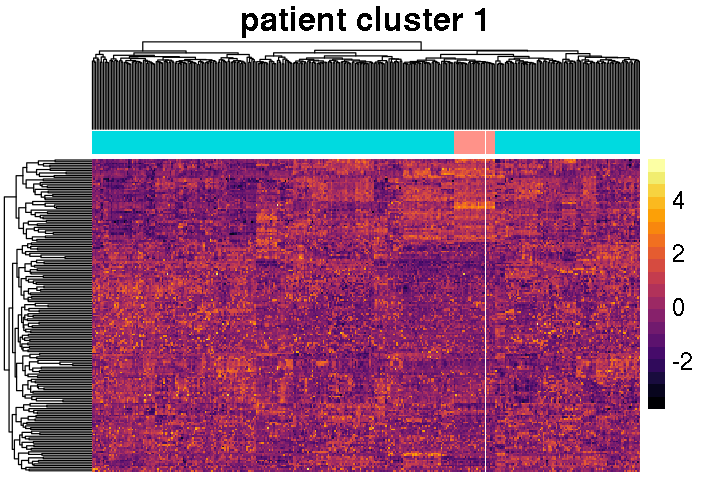

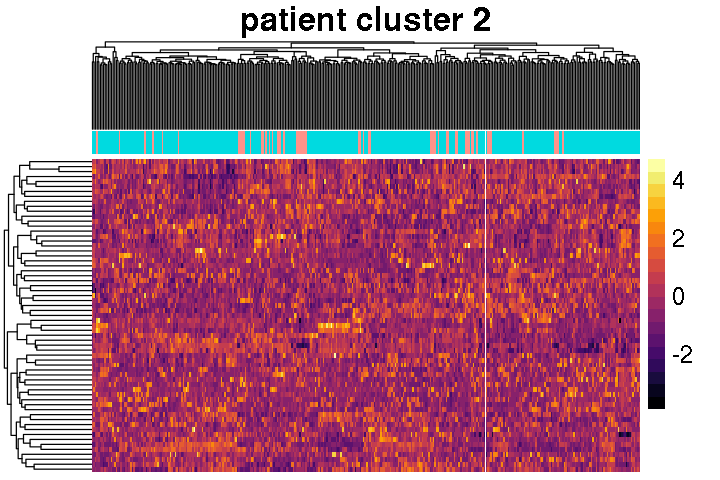

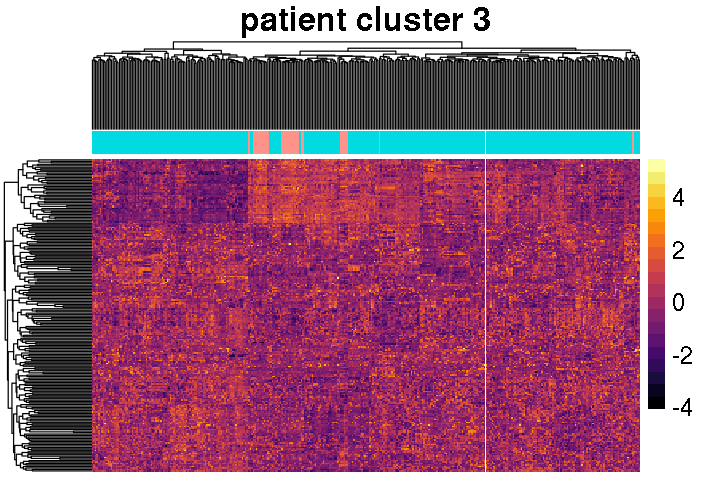

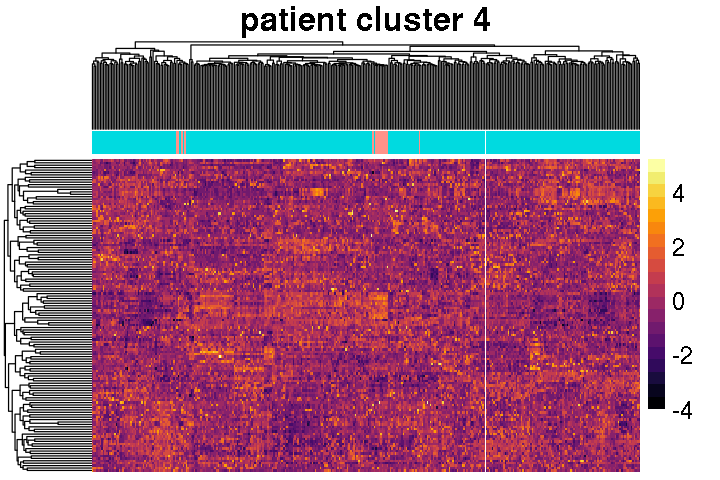

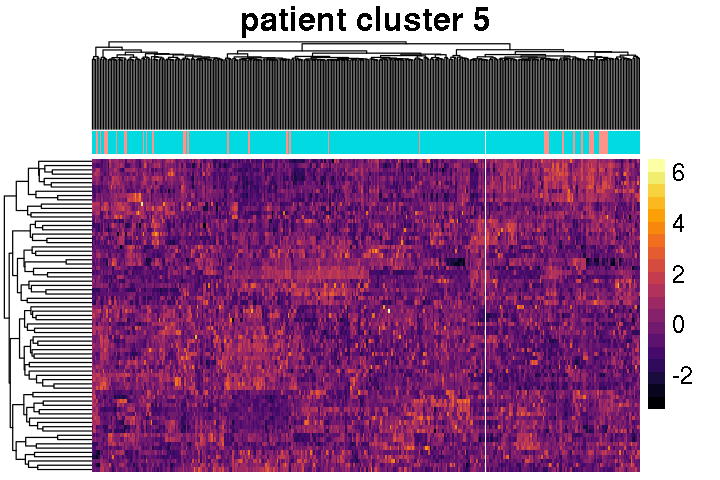

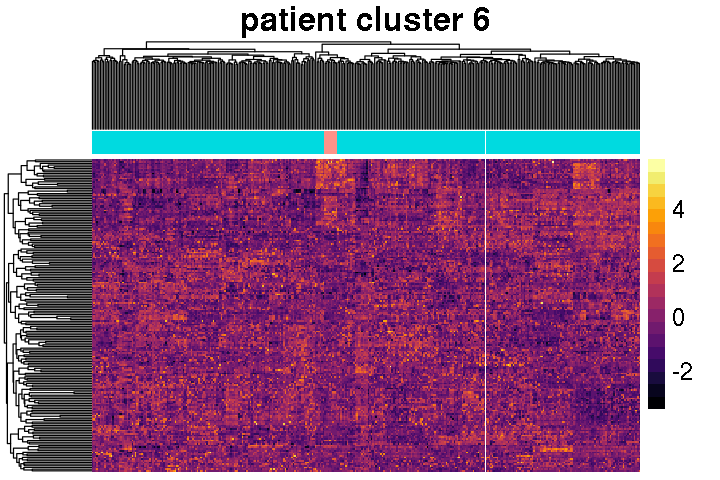

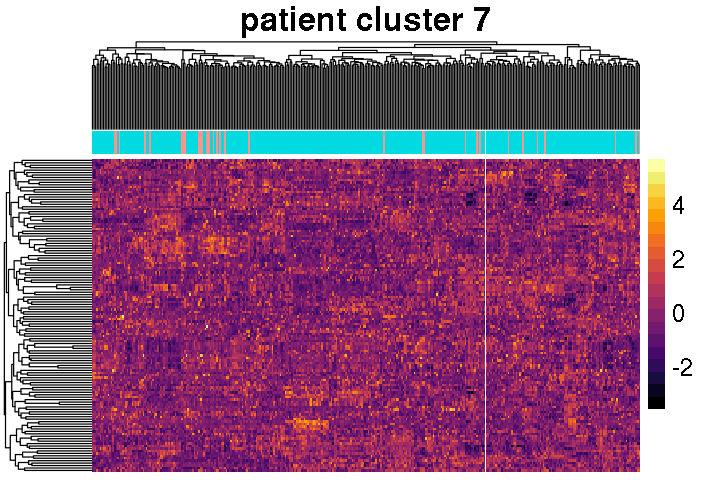

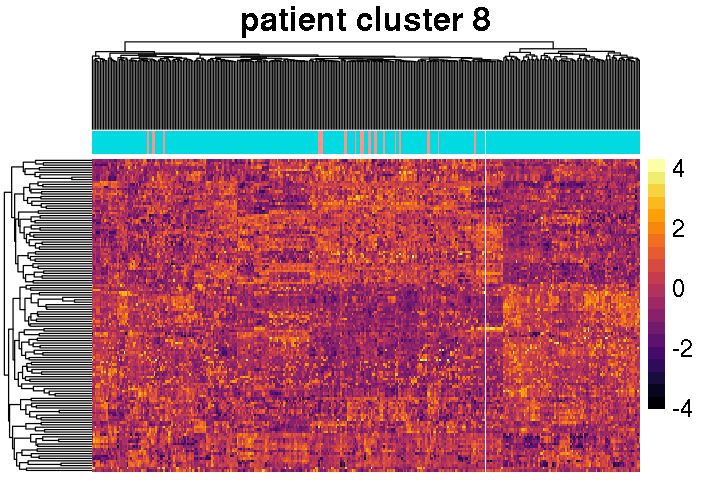

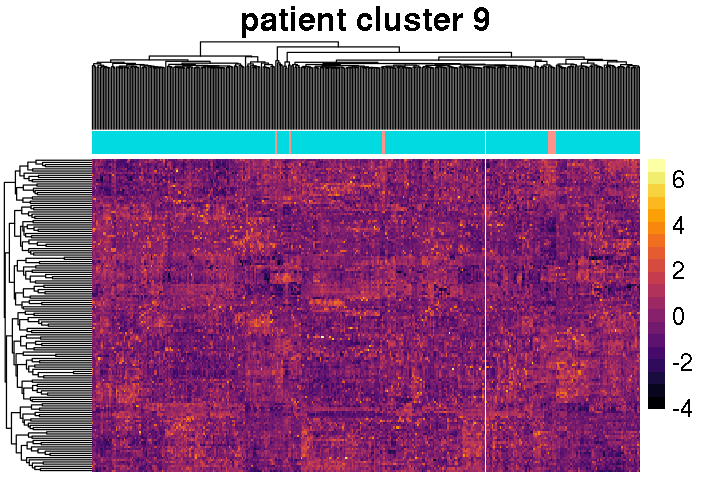

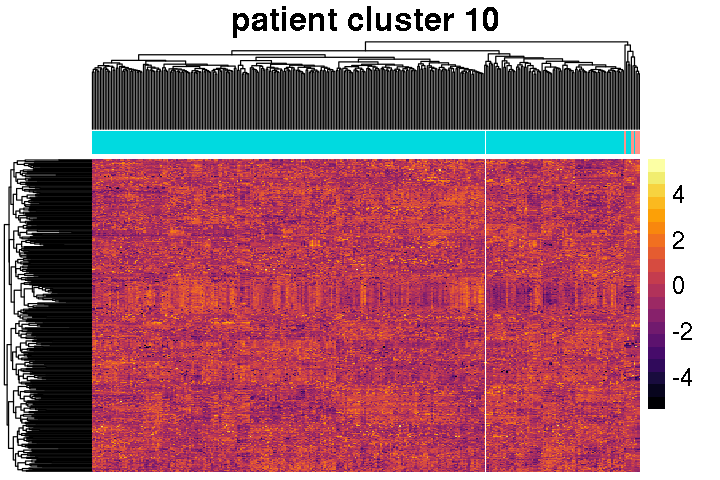

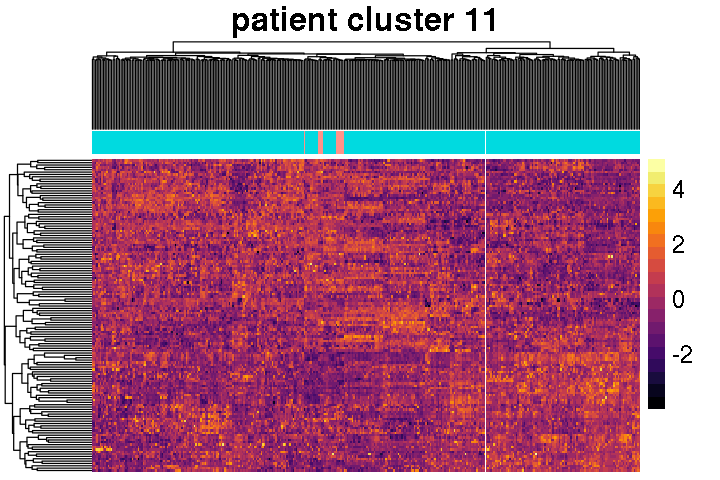

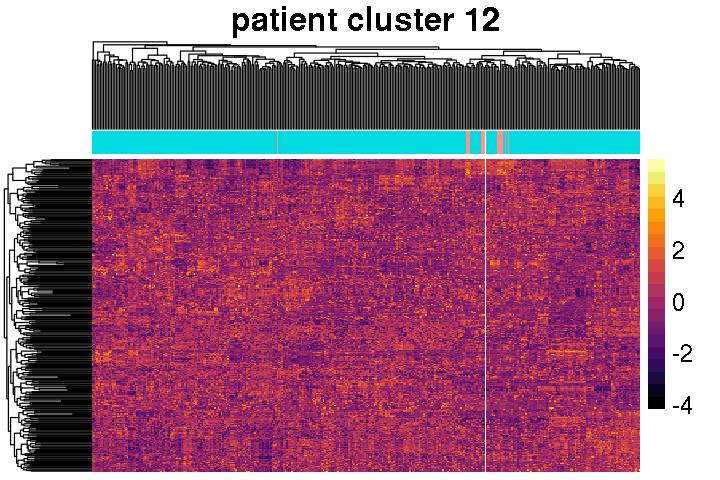

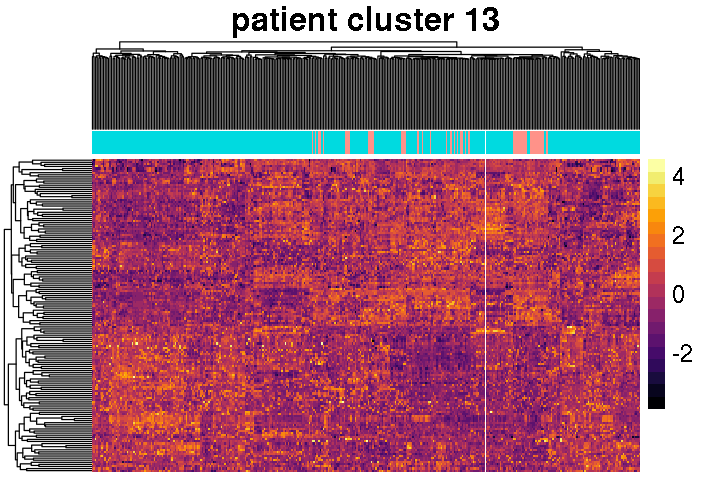

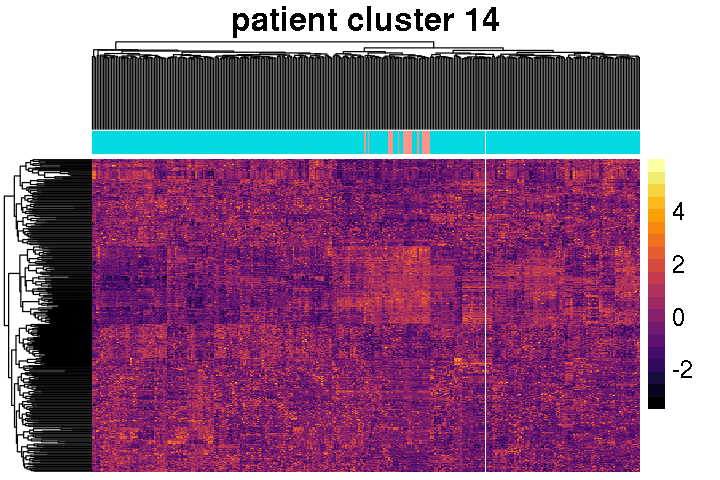

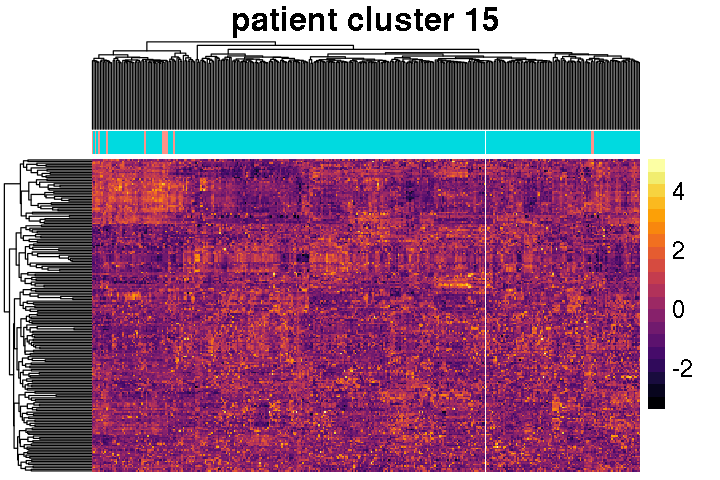

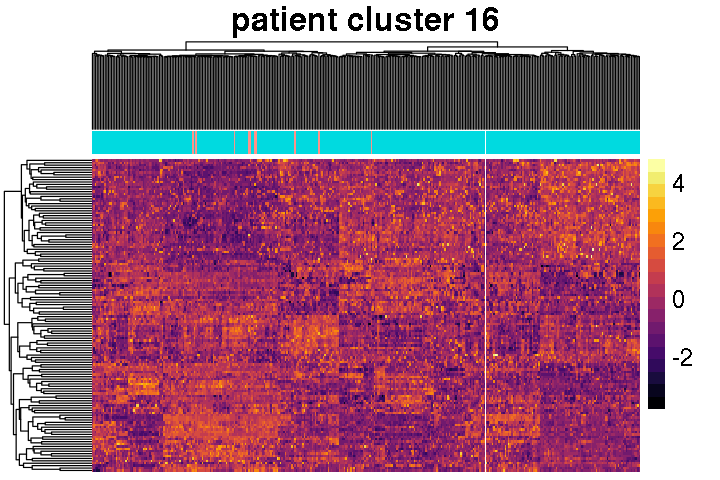

In [12]:
options(repr.plot.width=6, repr.plot.height=4)
plotCluster(1:16)

### Methylation aberrant signature derived from comparison with normal samples for each cluster does not well represent the patient cluster. The patient cluster doesn't all cluster together. 

## Clustering using methylation probes with sd > 1 across patients

In [13]:
# functions to plot correlation matrix and wss
reorder_cormat <- function(cormat, hc){
    # Use correlation between variables as distance
    cormat <-cormat[hc$order, hc$order]
}

get_lower_tri<-function(cormat){
    cormat[upper.tri(cormat, diag=T)] <- NA
    return(cormat)
}
  # Get upper triangle of the correlation matrix
get_upper_tri <- function(cormat){
    cormat[lower.tri(cormat, diag=T)]<- NA
    return(cormat)
}

# determine the optimal number of clusters using elbow method
wss <- function(d) { # within cluster sum of square
  sum(scale(d, scale = FALSE)^2)
}

wrap <- function(i, hc, x) { # wrapper for wss, i: number of clusters, hc: hclust object, x: original data
  cl <- cutree(hc, i)
  spl <- split(x, cl)
  wss <- sum(sapply(spl, wss)) # sum of WSS for all clusters
  wss 
}

In [16]:
cluster.data <- methylation.filtered[,-seq(2)]
cluster.data.raw <- cluster.data
for (i in seq(20)) {
    cluster.data.raw <- t(data.matrix(apply(cluster.data.raw, 1, scale)))
    cluster.data.raw <- data.matrix(apply(cluster.data.raw, 2, scale))
}

In [17]:
summary(apply(cluster.data.raw, 1, mean))
summary(apply(cluster.data.raw, 2, mean))
summary(apply(cluster.data.raw, 1, sd))
summary(apply(cluster.data.raw, 2, sd))

      Min.    1st Qu.     Median       Mean    3rd Qu.       Max. 
-4.798e-17 -1.597e-17  1.556e-18  1.022e-18  1.797e-17  4.747e-17 

      Min.    1st Qu.     Median       Mean    3rd Qu.       Max. 
-2.275e-17 -1.271e-17  3.113e-18  1.039e-18  1.450e-17  2.568e-17 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.001   1.001   1.001   1.001   1.001   1.001 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      1       1       1       1       1       1 

In [18]:
rownames(cluster.data.raw) <- methylation.filtered[,1]
colnames(cluster.data.raw) <- colnames(methylation.filtered)[-seq(2)]

In [32]:
clustering.correlation <- lingoes(as.dist(1 - cor(t(data.matrix(cluster.data.raw)), method='pearson')))
hclust.correlation <- hclust(clustering.correlation, method='ward.D2')

In [36]:
library(ConsensusClusterPlus)

In [39]:
cluster.data.mCentered = sweep(cluster.data, 2, apply(cluster.data, 2, median, na.rm=T)) # subtract column median
dim(cluster.data.mCentered)

In [56]:
title='/oak/stanford/groups/andrewg/users/szmamie/repos/MethylationPrediction/data/Figueroa/CC'
precomputed.dist <- lingoes(as.dist(1 - cor(t(cluster.data.mCentered), method='pearson')))

In [88]:
ward.D2 <- function(dist.mat, k) {
    tmp = stats::hclust(dist.mat, method='ward.D2')
    assignment = stats::cutree(tmp, k=k)
    return(assignment)
}

In [89]:
results = ConsensusClusterPlus(precomputed.dist, maxK=10, reps=50, pItem=0.8, pFeature=1, title=title, clusterAlg="ward.D2", 
                               seed=1262118388.71279, plot="png")

end fraction
clustered
clustered
clustered
clustered
clustered
clustered
clustered
clustered
clustered


In [90]:
icl = calcICL(results,title=title,plot="png")

In [91]:
title2 <- '/oak/stanford/groups/andrewg/users/szmamie/repos/MethylationPrediction/data/Figueroa/CC/rowColNormalized'
precomputed.dist2 <- lingoes(as.dist(1 - cor(t(cluster.data.raw), method='pearson')))

In [92]:
results2 = ConsensusClusterPlus(precomputed.dist2, maxK=10, reps=50, pItem=0.8, pFeature=1, title=title2, clusterAlg="ward.D2", 
                               seed=1262118388.71279, plot="png")

end fraction
clustered
clustered
clustered
clustered
clustered
clustered
clustered
clustered
clustered


In [109]:
annotation.cols = data.frame(ID=factor(cutree(clustering, k=16)))
rownames(annotation.cols) = colnames(cluster.data.raw)
annotation.rows = data.frame(probe=factor(cutree(results[[7]][['consensusTree']], k = 7)))
rownames(annotation.rows) = rownames(cluster.data.raw)

# clustering columns by correlation and complete linkage
options(repr.plot.height=6, repr.plot.width=6)
res <- pheatmap(
          mat               = cluster.data.raw, 
          annotation_col    = annotation.cols,
          annotation_legend = F,
          annotation_names_col = F,
          annotation_row    = annotation.rows, 
          annotation_names_row = F,
          color             = inferno(20),
          border_color      = NA,
          show_colnames     = FALSE,
          show_rownames     = FALSE,
          cluster_cols      = clustering,
          cluster_rows      = results[[7]][['consensusTree']],
          #fontsize          = 7,
          main              = paste0("all clusters")
        )

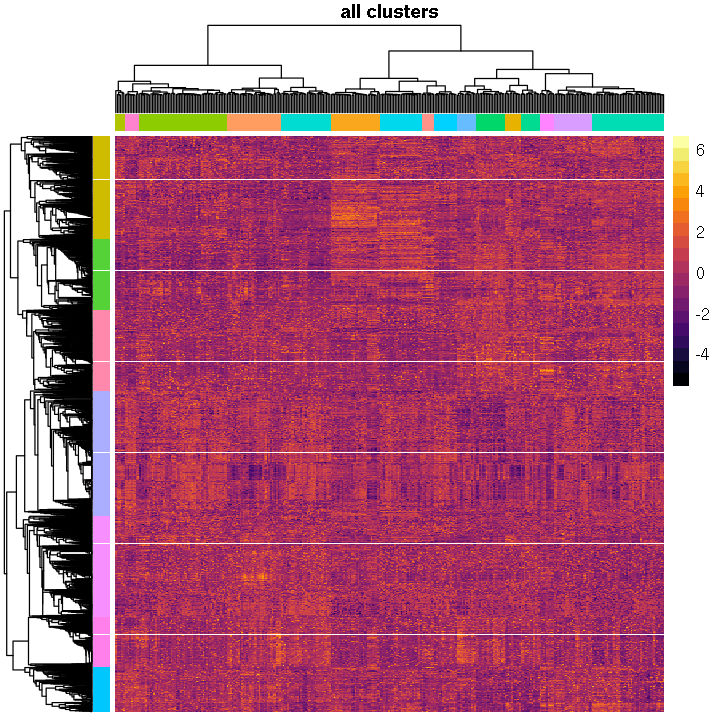

In [110]:
res

In [112]:
res.clust <- cbind(cluster.data.raw, 
                   cluster = cutree(results[[7]][['consensusTree']], k = 7))
tail(res.clust)

,GSM464771,GSM464772,GSM464773,GSM464774,GSM464775,GSM464776,GSM464777,GSM464778,GSM464779,GSM464780,⋯,GSM465024,GSM465026,GSM465030,GSM465060,GSM465061,GSM465062,GSM465063,GSM465064,GSM465065,cluster
MSPI0406S00550044,1.00216578,0.7386815,0.53172759,1.3801600,0.1300792,-0.4005483,-1.104685,1.1294638,-0.5207801,-0.2881316,⋯,1.001759963,0.2313352,-0.7746825,-0.7598044,0.7216852,-0.49839659,1.7509108,1.1336754,-0.3600918,5
MSPI0406S00252684,2.23002203,0.6046763,0.09799749,-1.0150025,-0.4358899,-1.4979395,-1.645391,0.6293168,-0.5157711,1.2640578,⋯,-0.058809802,-0.9264104,-0.9066333,-1.2793006,-1.0399912,-0.68072726,2.4118998,-0.4974054,-0.9708310,3
MSPI0406S00788062,0.32420393,-0.5845595,-0.06583020,-0.8069811,-0.2265084,1.3109722,-1.966939,1.0961812,-1.1452497,-0.4519490,⋯,1.937258097,-0.1183460,-0.2501360,1.2472993,1.2378567,-0.01281326,0.0735745,1.4928435,0.2852305,1
MSPI0406S00559240,0.03600055,0.6088262,-2.04764313,0.2811400,0.5579038,-1.0075632,-1.884861,0.4518119,-2.4033640,0.5936094,⋯,-0.597080580,0.8401346,0.6390440,-1.6103006,-1.9244426,1.26800408,0.5286658,1.1221954,-0.5357454,5
MSPI0406S00365314,-0.08946621,-0.2178167,-0.86021135,1.7020017,-0.8484346,-0.8359833,1.688315,0.8652623,0.1697289,-0.4028627,⋯,-0.107262780,1.3511377,-0.9384897,-0.7103287,-0.8050159,-0.28470973,-0.8774694,-0.2670952,2.0578693,1
MSPI0406S00160726,-0.58568835,0.8634614,1.67103120,-1.1163929,1.0589545,0.5357982,-1.027746,1.4651675,0.8967764,1.2389272,⋯,0.006505194,-0.6982733,-0.1390813,1.2127115,2.1291756,-0.38460913,-0.4728830,-0.1359742,1.3793535,7


In [116]:
dim(res.clust)

[1] 3745  345

In [117]:
trim.trailing <- function (x) sub("\\s+$", "", x)
res.clust <- data.matrix(res.clust)
rownames(res.clust) <- as.character(sapply(methylation.filtered[,2], function(x) trim.trailing(strsplit(x, '-')[[1]][1])))

In [118]:
head(res.clust)

,GSM464771,GSM464772,GSM464773,GSM464774,GSM464775,GSM464776,GSM464777,GSM464778,GSM464779,GSM464780,⋯,GSM465024,GSM465026,GSM465030,GSM465060,GSM465061,GSM465062,GSM465063,GSM465064,GSM465065,cluster
NOS3,-0.3209221,0.7437331,-1.5865591,1.43625353,-0.4031192,1.765125372,0.7718629,-0.2769187,0.7151102,1.0123317,⋯,0.54174322,-1.1299481,-0.64560186,-1.2421254,0.8268533,-0.5899965,-0.9209174,1.9426029,0.5576303,1
PARD6G,0.3551100,0.3424429,0.9017973,0.84926965,-1.7860586,0.353445459,-0.4209320,0.3641028,1.0927540,-0.9108578,⋯,-0.81422614,1.1276748,1.21794685,-0.8847018,0.9783142,0.9088513,1.4464112,1.3375741,-1.2193434,2
KIAA0907,1.8234191,2.1386032,-0.8755142,-0.93036959,-0.1365872,-1.104376130,0.4257712,1.4942379,-1.2211644,-1.0183642,⋯,-0.51772396,-0.9785800,1.63105411,-0.3217321,-0.7442774,-0.5381888,-0.7619262,-0.6688182,-1.4549071,3
SFT2D1,-0.1004879,0.8094989,-0.1174298,-0.13667581,3.9679122,-0.335297403,1.2823675,-0.3365721,-0.4289103,-0.1761355,⋯,-0.58892600,3.4251268,-1.07620369,-0.9455238,1.0592592,-0.6951691,-0.6229474,-0.2797164,-0.8508921,4
RAP2A,1.1020036,0.7394512,-0.8559291,1.62629080,0.5632572,-0.002808636,-1.3797497,-0.3630356,-0.8098417,1.0629036,⋯,0.93830516,0.8038830,0.04733865,0.4180303,-1.2079620,-1.2646654,1.0822027,1.2481446,-1.0228727,5
ITGA8,-0.2802714,1.5679925,-0.4480782,-0.08721108,-0.5202001,-1.066512938,1.8082233,-0.8247764,1.6403075,0.1204026,⋯,0.08429282,-0.5340413,1.89371705,-0.8092779,-0.8797858,-0.6311369,1.2633502,-0.5002683,-1.0485098,6


In [119]:
write.table(res.clust, file='../data//Figueroa/CC/colMedian/clustering.tsv', sep='\t', row.names=T, col.names=T, quote=F)

In [102]:
annotation.cols = data.frame(ID=factor(cutree(clustering, k=16)))
rownames(annotation.cols) = colnames(cluster.data.raw)
annotation.rows = data.frame(probe=factor(cutree(results2[[7]][['consensusTree']], k = 7)))
rownames(annotation.rows) = rownames(cluster.data.raw)

# clustering columns by correlation and complete linkage
options(repr.plot.height=6, repr.plot.width=6)
res <- pheatmap(
          mat               = cluster.data.raw, 
          annotation_col    = annotation.cols,
          annotation_legend = F,
          annotation_names_col = F,
          annotation_row    = annotation.rows, 
          annotation_names_row = F,
          color             = inferno(20),
          border_color      = NA,
          show_colnames     = FALSE,
          show_rownames     = FALSE,
          cluster_cols      = clustering,
          cluster_rows      = results2[[7]][['consensusTree']],
          #fontsize          = 7,
          main              = paste0("all clusters")
        )

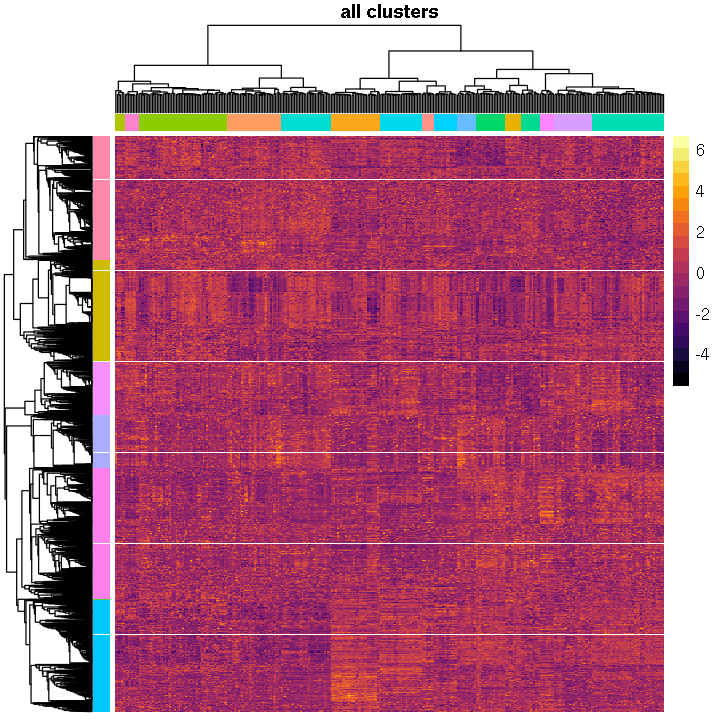

In [103]:
res

In [35]:
table(cutree(hclust.correlation, k=10))


  1   2   3   4   5   6   7   8   9  10 
234 682 205  98 397 393 628 312 290 506 

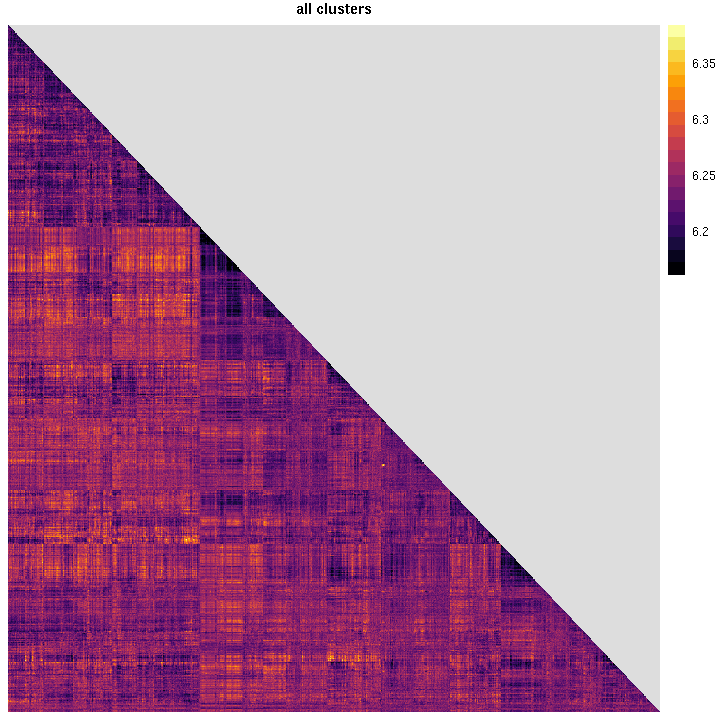

In [24]:
reordered.cormat <- reorder_cormat(as.matrix(clustering.correlation), hclust.correlation)
lower_tri <- get_lower_tri(reordered.cormat)

options(repr.plot.height=6, repr.plot.width=6)
res.plot <- pheatmap(
          mat               = lower_tri, 
          color             = inferno(20),
          border_color      = NA,
          show_colnames     = FALSE,
          show_rownames     = FALSE,
          cluster_cols      = F,
          cluster_rows      = F,
          fontsize          = 7,
          main              = paste0("all clusters")
        )

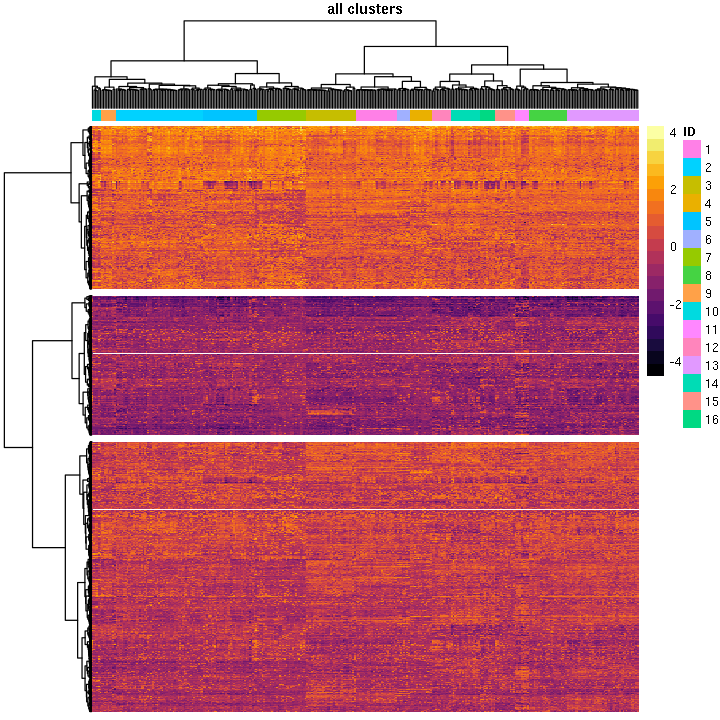

In [177]:
# clustering columns by 1-pearson with lingoes transformation to euclidean space and rows by euclidean
options(repr.plot.height=6, repr.plot.width=6)
res <- pheatmap(
          mat               = cluster.zscore, 
          annotation_col    = annotation,
          annotation_legend = T,
          annotation_names_col = F,
          color             = inferno(20),
          border_color      = NA,
          show_colnames     = FALSE,
          show_rownames     = FALSE,
          cluster_cols      = clustering,
          cluster_distance_rows = 'euclidean',
          clustering_method = 'ward.D2',
          fontsize          = 7,
          cutree_rows       = 3,
          main              = paste0("all clusters")
        )

In [170]:
clustering.euclidean <- dist(data.matrix(cluster.data), method='euclidean')
hclust.euclidean <- hclust(clustering.euclidean, method='ward.D2')

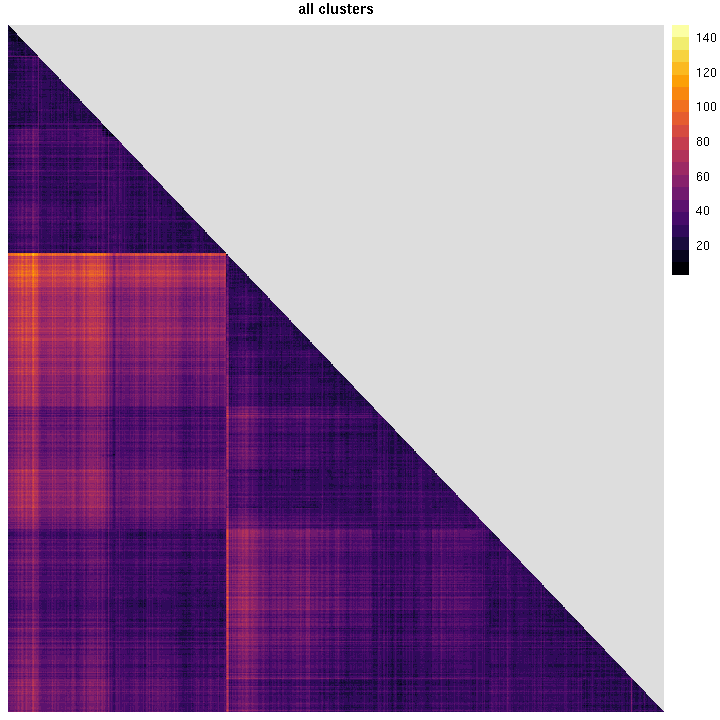

In [176]:
reordered.cormat <- reorder_cormat(as.matrix(clustering.euclidean), hclust.euclidean)
lower_tri <- get_lower_tri(reordered.cormat)

# clustering columns by 1-pearson with lingoes transformation to euclidean space and rows by euclidean
options(repr.plot.height=6, repr.plot.width=6)
res.plot <- pheatmap(
          mat               = lower_tri, 
          #annotation_col    = annotation,
          #annotation_legend = T,
          #annotation_names_col = F,
          color             = inferno(20),
          border_color      = NA,
          show_colnames     = FALSE,
          show_rownames     = FALSE,
          cluster_cols      = F,
          cluster_rows      = F,
          fontsize          = 7,
          #cutree_rows       = 4,
          main              = paste0("all clusters")
        )

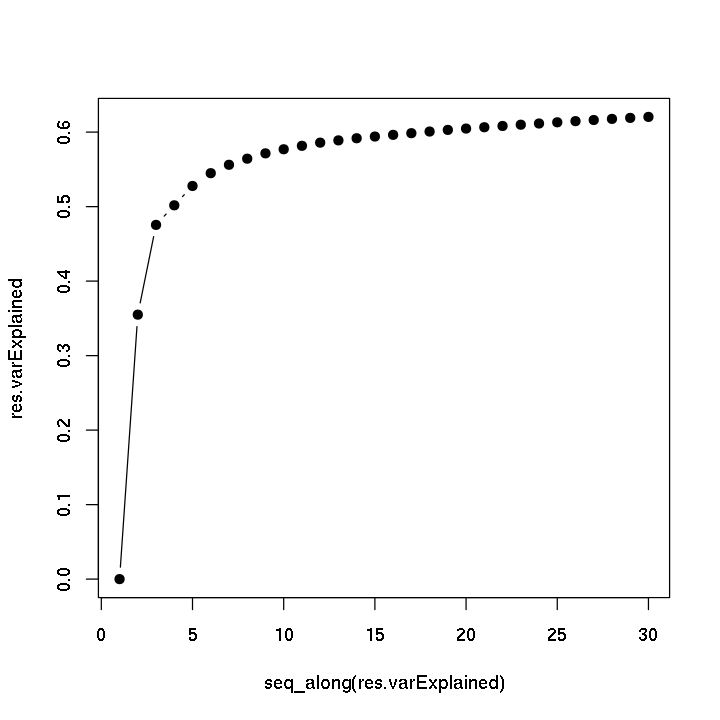

In [173]:
n = 30
res.wss <- sapply(seq(1, n), wrap, h = hclust.euclidean, x = cluster.data)

TSS <- res.wss[1]
res.varExplained <- sapply(res.wss, function(x) (TSS - x)/TSS)

plot(seq_along(res.varExplained), res.varExplained, type = "b", pch = 19)

## Preprocessing RNAseq

In [120]:
rnaseq <- read.csv('../data/Figueroa/data/GEP-filtered.tsv', sep='\t', stringsAsFactor=F,
                       header=T) # Affymetrix Human Genome U133 Plus 2.0 Array

In [131]:
tail(rnaseq)

,Name,Description,GSM464771,GSM464772,GSM464773,GSM464774,GSM464775,GSM464776,GSM464777,GSM464778,⋯,GSM465020,GSM465024,GSM465026,GSM465030,GSM465060,GSM465061,GSM465062,GSM465063,GSM465064,GSM465065
17783,AFFX-ThrX-3_at,#N/A - #N/A,70.107493,93.42927,86.18598,123.66459,145.28577,30.84808,17.49620,79.15634,⋯,41.43775,20.513439,33.49192,13.222403,52.515031,11.074794,21.354630,10.262745,7.423011,3.218391
17784,AFFX-ThrX-5_at,#N/A - #N/A,56.027612,56.70292,23.56772,103.76388,12.76447,14.04131,11.64284,82.00069,⋯,88.66644,83.280503,46.28067,12.665201,21.212091,24.122989,15.995754,15.228934,16.992002,18.196854
17785,AFFX-ThrX-M_at,#N/A - #N/A,5.306043,21.18921,12.08393,23.96944,18.86633,20.51532,14.59527,5.63437,⋯,12.20853,8.775296,10.62474,13.224708,7.339656,11.141099,14.023897,7.090471,11.558058,23.734968
17786,AFFX-TrpnX-3_at,#N/A - #N/A,12.250653,39.41487,13.44332,22.04989,24.78565,38.19069,12.38791,22.77973,⋯,31.72011,13.412166,11.70631,3.998223,5.106278,5.129933,5.003066,4.962148,6.540151,3.910525
17787,AFFX-TrpnX-5_at,#N/A - #N/A,24.790650,15.46484,24.18146,39.39449,38.39768,84.74253,29.92883,46.50745,⋯,45.76133,77.210479,14.56975,3.811776,40.314003,18.940729,21.330637,56.612833,21.994547,8.907632
17788,AFFX-TrpnX-M_at,#N/A - #N/A,12.289366,11.58558,16.86245,32.60270,14.80626,13.62427,13.15644,14.61663,⋯,51.71964,85.768699,11.35280,8.919474,5.779041,12.478253,55.373719,7.731440,33.238462,7.983401


In [127]:
rnaseq.matrix <- data.matrix(rnaseq[,-seq(2)])
colnames(rnaseq.matrix) <- colnames(rnaseq)[-seq(2)]
rownames(rnaseq.matrix) <- sapply(rnaseq[,2], function(x) trim.trailing(strsplit(x, ' - ')[[1]][1]))

In [128]:
head(rnaseq.matrix)

,GSM464771,GSM464772,GSM464773,GSM464774,GSM464775,GSM464776,GSM464777,GSM464778,GSM464779,GSM464780,⋯,GSM465020,GSM465024,GSM465026,GSM465030,GSM465060,GSM465061,GSM465062,GSM465063,GSM465064,GSM465065
AKT3,74.31740,27.66245,102.07207,101.63736,31.43173,74.90709,68.88680,114.403609,98.71250,103.85623,⋯,106.803302,207.452783,120.70662,84.648495,139.102372,43.22202,236.683761,210.127001,220.16244,147.47831
MED6,660.56974,536.18860,314.06915,856.60955,708.81936,433.50528,528.43526,448.259500,543.21804,707.80086,⋯,406.981439,586.143017,410.51695,486.993564,547.827207,587.26037,549.849441,398.540223,457.63892,384.29063
NR2E3,84.34185,56.78113,45.26591,174.51750,70.79560,82.05186,73.81927,142.904371,122.18294,144.36776,⋯,75.138066,71.230441,25.49023,54.557642,49.459930,113.59767,52.312650,83.311828,34.09275,52.96940
NAALAD2,5.86148,32.40837,51.85005,76.56115,73.57939,13.53790,29.43585,8.635934,13.02460,10.61099,⋯,6.783521,8.134337,95.36241,6.910256,8.776655,31.93541,4.049604,6.307205,20.37099,40.27214
CDKN2BAS,12.71641,22.27272,23.98954,29.54436,31.35884,22.69185,18.98887,23.015576,16.36056,25.88538,⋯,11.820467,28.308667,56.69111,48.705325,17.938633,81.94882,14.863483,21.384744,11.86531,57.72122
---,299.88601,265.28552,478.21075,308.41479,263.84549,472.05668,481.85199,250.774280,390.72175,267.47620,⋯,625.654443,254.955755,477.76088,284.719476,367.214957,451.12851,476.677204,433.073318,370.91945,395.67301


In [137]:
genes <- unique(rownames(rnaseq.matrix))
write.table(genes, file='../data/Figueroa/rnaseqgenes.tsv', sep='\t', col.names=F, row.names=F, quote=F)

In [138]:
terms.filtered <- read.csv('../data/Figueroa/terms.tsv', sep='\t', header=T, stringsAsFactor=F)

In [139]:
filtered.idx <- which(rownames(rnaseq.matrix) %in% terms.filtered$name)
rnaseq.filtered <- rnaseq.matrix[filtered.idx,]

In [140]:
dim(rnaseq.filtered)

[1] 3418  344

In [ ]:
write.table(rnaseq.filtered, file='../data/Figueroa/rnaseq.tsv', sep='\t', row.names=T, col.names=T, quote=F)